# Data Analysis -- Measuring Coronavirus Response Consistency -- Sentiment Analysis
***

In [1]:
%run data_processing.ipynb

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Commjhub/jupyterhub/comm318_fall2019/jdlish/nltk_data
[nltk_data]     ...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
%run Functions.ipynb

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Commjhub/jupyterhub/comm318_fall2019/jdlish/nltk_data
[nltk_data]     ...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Sentiment Analysis Using VADER

### Sentiment Analysis is a broad term used to describe natural language processing approaches used to quantify the types and degree of emotions expressed in text. Emotion, particularly the balance of negative and positive emotion, is a key element of a response to an event/topic. Two sources covering the same news topic may convey similar information with different emotions, and this ultimately can create major differences between the resulting emotions news outlet viewers adopt themselvs towards that topic. Additionally, different emotions may indicate that the two sources convey different content and information altogether while reporting on a given topic. Thus, conducting sentiment analysis on both Fox and CNN news broadcasts covering the coronavirus, analyzing sentiment trends over time, and comparing the results between the two news outlets, can reveal important similarities and differences between their overall responses to the coronavirus.

### In this project I used VADER (Valence Aware Dictionary and sEntiment Reasoner), a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. I used the VADER algorithm which gives text proportional scores for negative, netural and positive emotion, and then calculates a compound score for the entire text which represents the overall positive or negative direction and magnitude of the emotions of the text. Compound scores are scaled between -1 and 1.

### To begin, I created a new feature in each of my dataframes which contains "targeted sentiment analysis." I created a function which makes "targeted text" as previously described, and then finds the sentiment score for that targeted text. For sentiment analysis however, I used 4 words before and after each key word I included because I wanted to exclude as much noise as possible and focus solely on responses directly pertaining to coronavirus. The code to do this is found below, and the function targeted_sentiment can be found in the functions notebook.


In [2]:
keys=['coronavirus',"pandemic","covid19"]
new_col_fox1=[]

for i in range(len(data_fox['body_text'])):
    text=data_fox['Tokenized Text'][i]
    sentiment_score=targeted_sentiment(kw=keys,text=text,win=4)
    new_col_fox1.append(sentiment_score)
    

#For CNN
new_col_cnn1=[]

keys=['coronavirus',"pandemic","covid19"]
for i in range(len(data_cnn['body_text'])):
    text=data_cnn['Tokenized Text'][i]
    sentiment_score=targeted_sentiment(kw=keys,text=text,win=4)
    new_col_cnn1.append(sentiment_score)
    

#Add targeted sentiment scores as a new column to each dataframe
data_fox['targeted_sentiment']=new_col_fox1
data_cnn['targeted_sentiment']=new_col_cnn1


### Next, I found the average sentiment score of both Fox and CNN between January and April. Despite coronavirus news broadcasts feeling very negative, both Fox and CNN appear to have sentiment scores that are only slightly negative. This means that on average, both news outlets have covered coronavirus news with slightly negative emotion. An interesting finding is that it appears that Fox news transcripts appear to be more negative than CNN news transcripts (-0.18 vs. -0.09 average sentiment score), although the difference appears to be only 0.09.

In [3]:
print("Average polarity score of CNN News Transcripts:  ", round(mean(new_col_cnn1),2))
print("Average polarity score of Fox News Transcripts:  ", round(mean(new_col_fox1),2))

Average polarity score of CNN News Transcripts:   -0.09
Average polarity score of Fox News Transcripts:   -0.18


### Next, I looked at both Fox and CNN sentiment over time. As shown below, it appears that the sentiment of Fox's news transcripts is more inconsistent compared with that of CNN's; Fox's daily news transcript sentiment varies much more than that of CNN's between January and April.

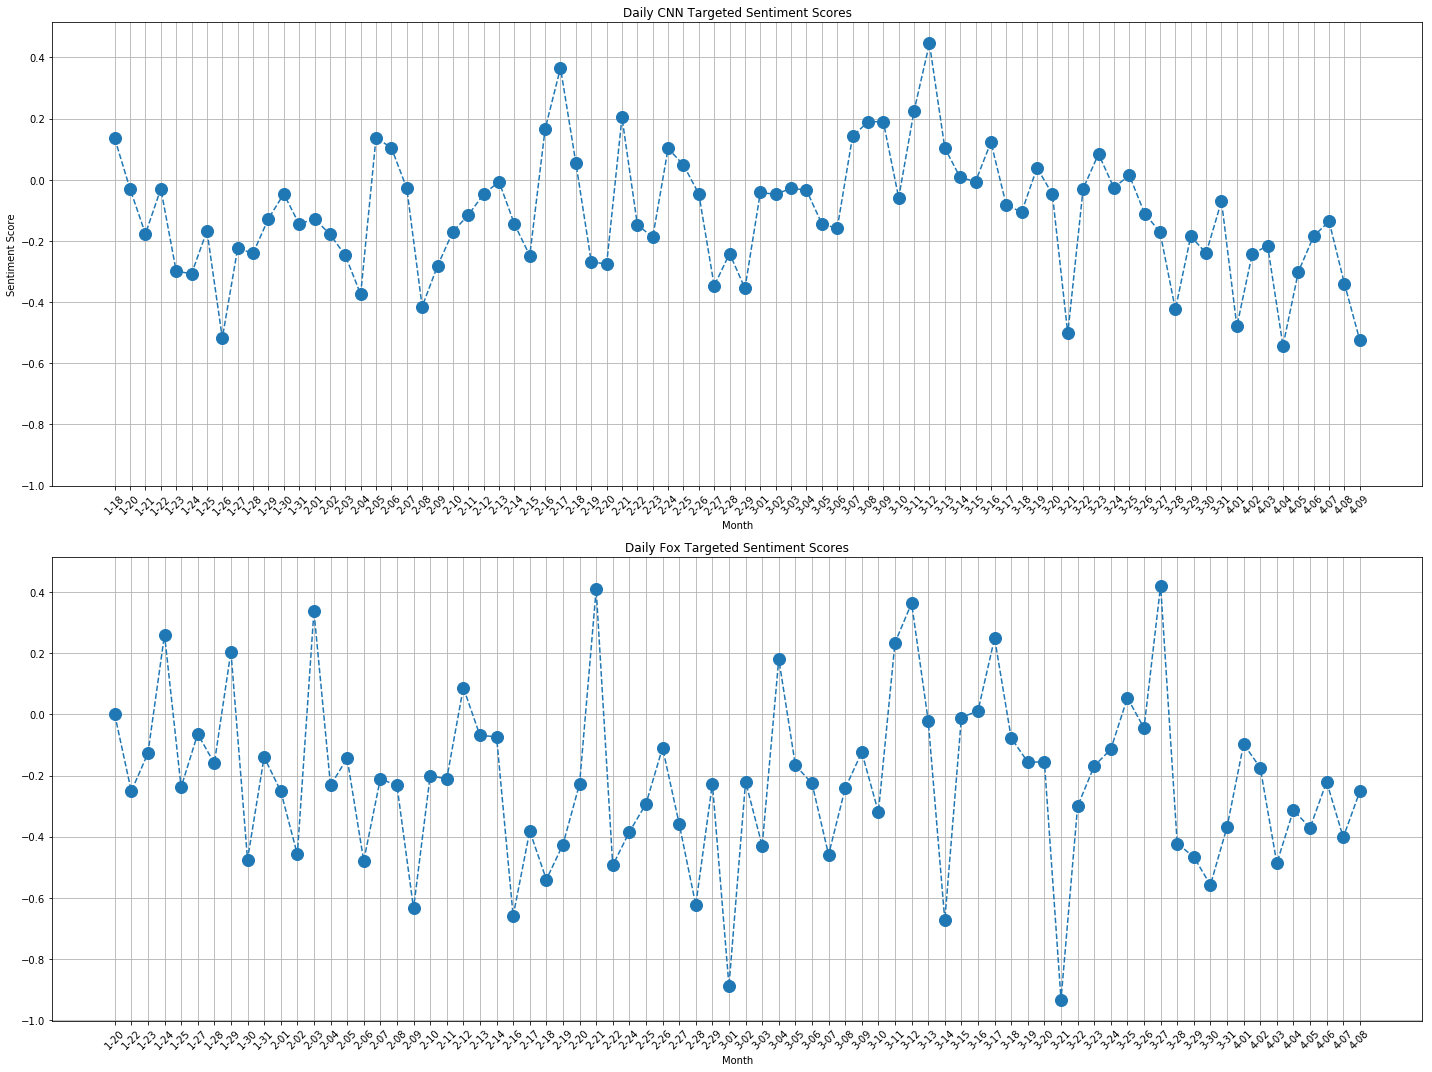

In [5]:
#CNN
daily_cnn = {}
for i in range(len(data_cnn)):
    date=data_cnn["full_date"][i]
    if not data_cnn["full_date"][i]=='nan':
        try:
            daily_cnn[date].append(data_cnn["targeted_sentiment"][i])
        except:
            daily_cnn[date] = [data_cnn["targeted_sentiment"][i]]

data_for_figure_cnn = {}
for x,y in daily_cnn.items():
    data_for_figure_cnn.update({x:sum(y)/len(y)})

#Sort by date:
data_for_figure_2_cnn={k: v for k, v in sorted(data_for_figure_cnn.items(), key=lambda item: item[0])}

x,y = zip(*sorted(data_for_figure_2_cnn.items()))

#Fox
daily_fox = {}
for i in range(len(data_fox)):
    date=data_fox["full_date"][i]
    if not data_fox["full_date"][i]=='nan':
        try:
            daily_fox[date].append(data_fox["targeted_sentiment"][i])
        except:
            daily_fox[date] = [data_fox["targeted_sentiment"][i]]

data_for_figure_fox = {}
for f,g in daily_fox.items():
    data_for_figure_fox.update({f:sum(g)/len(g)})

#Sort by date:
data_for_figure_2_fox={k: v for k, v in sorted(data_for_figure_fox.items(), key=lambda item: item[0])}

c,d = zip(*sorted(data_for_figure_2_fox.items()))



fig,(ax1, ax2) = plt.subplots(2,1,figsize=(20,15),sharey=True)
ax1.plot(x,y,marker='o',linestyle='dashed',markersize=12)
month_day_1=[]
for date in x:
    month_day_1.append(date[6:])
ax1.set_xticks(x)
ax1.set_xticklabels(month_day_1, rotation=45)
ax1.set_title('Daily CNN Targeted Sentiment Scores')
ax1.set_xlabel("Month")
ax1.set_ylabel("Sentiment Score")
ax2.plot(c,d,marker='o',linestyle='dashed',markersize=12)
ax2.set_title('Daily Fox Targeted Sentiment Scores')
ax2.set_xlabel("Month")
month_day_2=[]
for date in c:
    month_day_2.append(date[6:])
ax2.set_xticks(c)
ax2.set_xticklabels(month_day_2, rotation=45)
plt.tight_layout()
ax1.grid()
ax2.grid()



### Then, I found the range and standard deviation of the sentiment scores of both Fox and CNN news transcripts between January and April at the daily level. The daily sentiment of CNN news transcripts have a lower standard deviation and range compared with that of Fox news transcripts. CNN's daily news transcript sentiment has a standard deviation of 0.199 while Fox's daily news transcript sentiment has a standard deviation of 0.275. There appears to be a meaningful difference between the range and standard deviation of the news outlet's sentiment standard deviation and range. Standard deviation and range are important because they reveal the degree of consistency in sentiment that the news outlets display. Inconsistency in sentiment could confuse viewers, and muddle the overall effectiveness and quality of a news outlet's coverage on a given topic. On average it appears that CNN's sentiment is more consistent than Fox's sentiment. 

In [16]:
def getrange(numbers):
    return max(numbers) - min(numbers)

print("Range of Daily CNN News Transcript Targeted Sentiment:  ", getrange(data_for_figure_cnn.values()))
print("Range of Daily Fox News Transcript Targeted Sentiment:  ", getrange(data_for_figure_fox.values()))
print("STDev of Daily CNN News Transcript Targeted Sentiment:  ", round(stdev(data_for_figure_cnn.values()),3))
print("STDev of Daily Fox News Transcript Targeted Sentiment:  ", round(stdev(data_for_figure_fox.values()),3))

Range of Daily CNN News Transcript Targeted Sentiment:   0.988887584345479
Range of Daily Fox News Transcript Targeted Sentiment:   1.3540041666666667
STDev of Daily CNN News Transcript Targeted Sentiment:   0.2
STDev of Daily Fox News Transcript Targeted Sentiment:   0.275


### From a daily perspective, it appears like the sentiment of Fox's news transcripts is more inconsistent compared with the sentiment of CNN's news transcripts; Fox's daily news transcript sentiment varies much more than that of CNN's day to day between January and April. CNN's daily news transcript sentiment appears to have a lower standard deviation and range compared with Fox's daily news transcript sentiment. This observation appears to be consistent over time and isn't confined to just a certain time period or certain days. 


### Overall, it appears that when it comes to overall sentiment, a key element of news outlet coronavirus response, Fox and CNN differ in consistency. Fox's inconsistent emotion in their news transcripts relative to that of CNN in their own news transcripts, may indicate that Fox's overall response to coronavirus covrage is more inconsistent than CNN's. However, in order to make broader conclusions like this, additional analyses delving into consistency of response must be conducted. These will include VAD analysis to bolster the above findings, as well as KWIC analysis, in order to bolster the above findings while providing specific examples of how Fox is more inconsistent in their coronavirus response relative to CNN's coronavirus response. I will begin with VAD analysis next.

## VAD Analysis

### Words play a central role in language and thought. Several influential factor analysis studies have shown that the primary dimensions of word meaning are valence, arousal, and dominance (VAD) (Osgood et al., 1957; Russell, 1980, 2003).

### Valence is the positive--negative or pleasure--displeasure dimension; Arousal is the excited--calm or active--passive dimension; and Dominance is the powerful--weak or 'have full control'--'have no control' dimension.

### The NRC Valence, Arousal, and Dominance (VAD) Lexicon includes a list of more than 20,000 English words and their valence, arousal, and dominance scores. For a given word and a dimension (V/A/D), the scores range from 0 (lowest V/A/D) to 1 (highest V/A/D). The lexicon with its fine-grained real-valued scores was created by manual annotation using Best--Worst Scaling. The lexicon is markedly larger than any of the existing VAD lexicons. The above study also showed that the ratings obtained using this methodology are substantially more reliable than those in existing lexicons. 

### Thus, analyzing the VAD scores of the news broadcasts of both Fox and CNN over time could provide another dimension to make conclusions about the overall sentiment of each of the news outlet's news broadcasts surrounding the coroanvirus. This analysis can be used in conjunction with the sentiment analysis conducted above, to provide further evidence to support and identify consistency trends in the sentiment of both Fox and CNN over time. Sentiment is a large and strong component of news outlet response to a given issue, which makes it an important factor to consider when comparing the responses of Fox and CNN to the coronavirus over time.

In [4]:
NRC_VAD = {}

for r, line in enumerate(open('Data Files/Lexicons/NRC-VAD-Lexicon.txt')):
    if r>0:
        word, V,A,D = line.strip().split('\t')
        NRC_VAD[word] = {'V': float(V), 
                         'A': float(A),
                         'D': float(D)}

### First, I created new columns in each of my dataframes, containing Valence, Arousal, or Dominance Scores. These were calculated using the 'targeted text' feature I described previously.

In [5]:
#CNN VAD Analysis
Valence=[]
Arousal=[]
Dominance=[]
strip_chars=';:."--,!$%^&*@#'
for i in range(len(data_cnn["targeted text"])):
    toks = tokenize(data_cnn["targeted text"][i],strip_chars=strip_chars)
    text=process_text(toks)
    Valence.append(text[0])
    Arousal.append(text[1])
    Dominance.append(text[2])

data_cnn["Valence"]=Valence
data_cnn['Arousal']=Arousal
data_cnn['Dominance']=Dominance

In [6]:
#Fox VAD Analysis
Valence=[]
Arousal=[]
Dominance=[]
strip_chars=';:."--,!$%^&*@#'
for i in range(len(data_fox["targeted text"])):
    toks = tokenize(data_fox["targeted text"][i],strip_chars=strip_chars)
    text=process_text(toks)
    Valence.append(text[0])
    Arousal.append(text[1])
    Dominance.append(text[2])

data_fox["Valence"]=Valence
data_fox['Arousal']=Arousal
data_fox['Dominance']=Dominance

### At first glance, it doesn't appear like the VAD scores of Fox and CNN are different. The average VAD scores are very similar as shown below. 

In [7]:
print("Average Arousal score of Fox News Transcripts:  ", round(data_fox["Arousal"].mean(),3))
print("Average Valence score of Fox News Transcripts:  ", round(data_fox["Valence"].mean(),3))
print("Average Dominance score of Fox News Transcripts:  ", round(data_fox["Dominance"].mean(),3))

Average Arousal score of Fox News Transcripts:   0.141
Average Valence score of Fox News Transcripts:   0.17
Average Dominance score of Fox News Transcripts:   0.166


In [8]:
print("Average Arousal score of CNN News Transcripts:  ", round(data_cnn["Arousal"].mean(),3))
print("Average Valence score of CNN News Transcripts:  ", round(data_cnn["Valence"].mean(),3))
print("Average Dominance score of CNN News Transcripts:  ", round(data_cnn["Dominance"].mean(),3))

Average Arousal score of CNN News Transcripts:   0.136
Average Valence score of CNN News Transcripts:   0.167
Average Dominance score of CNN News Transcripts:   0.161


### In order to assess how VAD scores have changed over time for both Fox and CNN news broadcasts surrounding the coronavirus, I plotted VAD over time for each news outlet at the daily level. This would provide me with a detailed view of VAD trends. This will help me make more definitive conclusions and comparisons between the VAD scores of each news outlet.

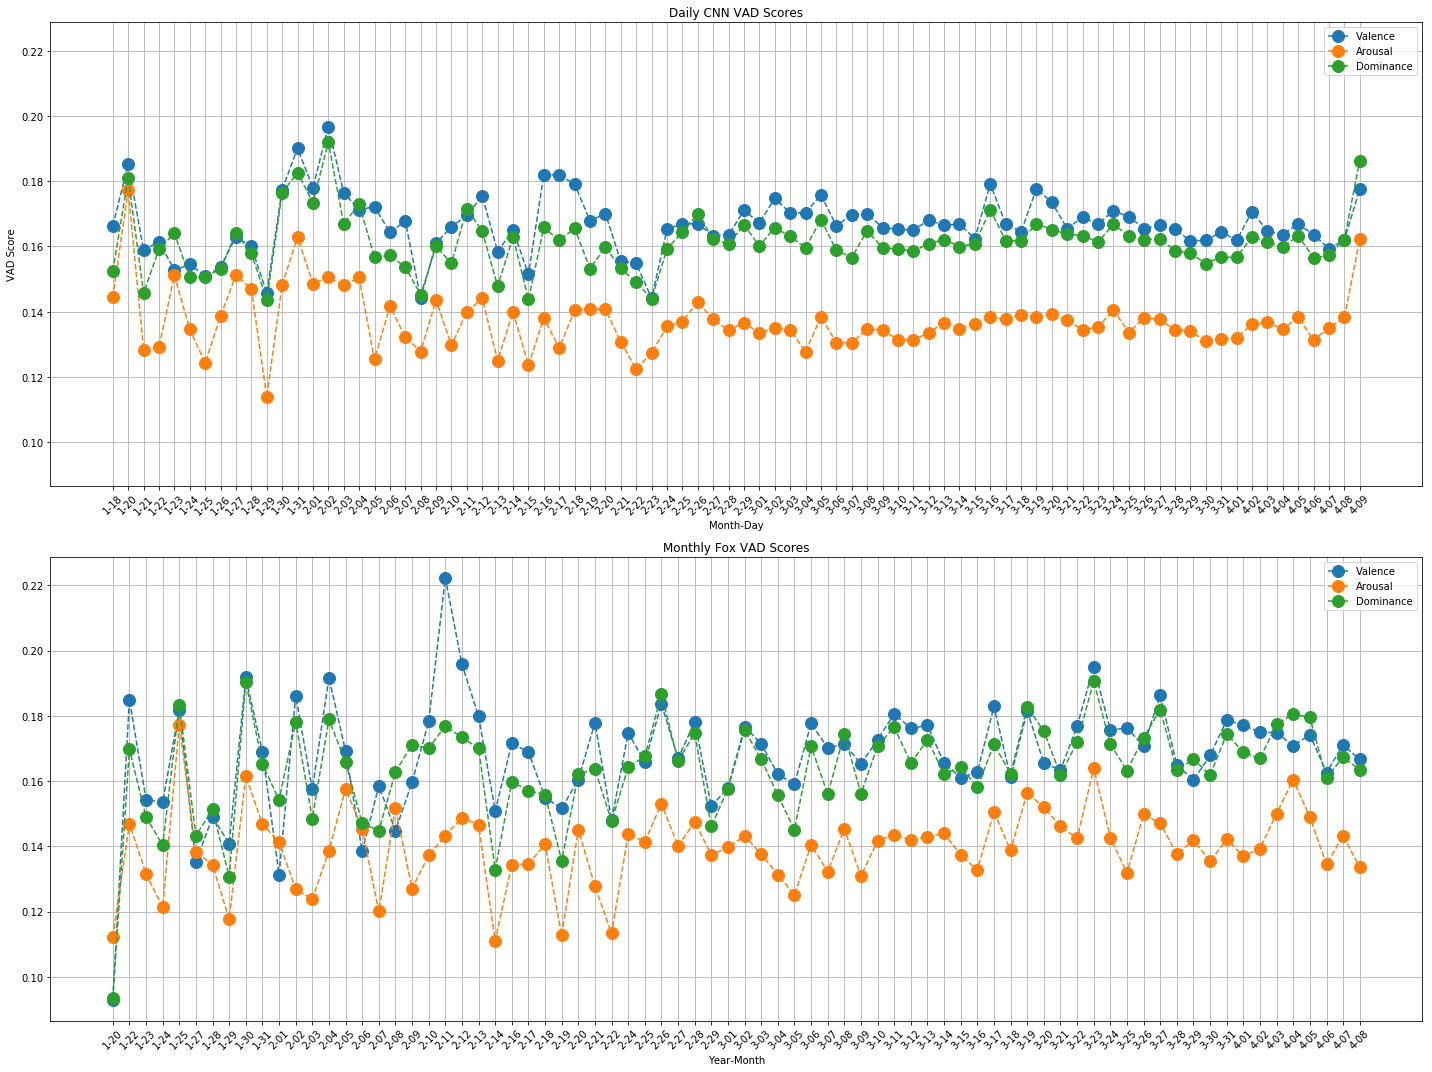

In [22]:
#CNN
daily_cnn_v = {}
for i in range(len(data_cnn)):
    date=data_cnn["full_date"][i]
    if not data_cnn["full_date"][i]=='nan':
        try:
            daily_cnn_v[date].append(data_cnn["Valence"][i])
        except:
            daily_cnn_v[date] = [data_cnn["Valence"][i]]

data_v_cnn = {}
for x,y in daily_cnn_v.items():
    data_v_cnn.update({x:sum(y)/len(y)})

#Sort by date:
data_for_figure_v_cnn={k: v for k, v in sorted(data_v_cnn.items(), key=lambda item: item[0])}

a,b = zip(*sorted(data_for_figure_v_cnn.items()))

daily_cnn_a = {}
for i in range(len(data_cnn)):
    date=data_cnn["full_date"][i]
    if not data_cnn["full_date"][i]=='nan':
        try:
            daily_cnn_a[date].append(data_cnn["Arousal"][i])
        except:
            daily_cnn_a[date] = [data_cnn["Arousal"][i]]

data_a_cnn = {}
for x,y in daily_cnn_a.items():
    data_a_cnn.update({x:sum(y)/len(y)})

#Sort by date:
data_for_figure_a_cnn={k: v for k, v in sorted(data_a_cnn.items(), key=lambda item: item[0])}

c,d = zip(*sorted(data_for_figure_a_cnn.items()))

daily_cnn_d = {}
for i in range(len(data_cnn)):
    date=data_cnn["full_date"][i]
    if not data_cnn["full_date"][i]=='nan':
        try:
            daily_cnn_d[date].append(data_cnn["Dominance"][i])
        except:
            daily_cnn_d[date] = [data_cnn["Dominance"][i]]

data_d_cnn = {}
for x,y in daily_cnn_d.items():
    data_d_cnn.update({x:sum(y)/len(y)})

#Sort by date:
data_for_figure_d_cnn={k: v for k, v in sorted(data_d_cnn.items(), key=lambda item: item[0])}

e,f = zip(*sorted(data_for_figure_d_cnn.items()))

#FOX
daily_fox_v = {}
for i in range(len(data_fox)):
    date=data_fox["full_date"][i]
    if not data_fox["full_date"][i]=='nan':
        try:
            daily_fox_v[date].append(data_fox["Valence"][i])
        except:
            daily_fox_v[date] = [data_fox["Valence"][i]]

data_v_fox = {}
for x,y in daily_fox_v.items():
    data_v_fox.update({x:sum(y)/len(y)})

#Sort by date:
data_for_figure_v_fox={k: v for k, v in sorted(data_v_fox.items(), key=lambda item: item[0])}

g,h = zip(*sorted(data_for_figure_v_fox.items()))

daily_fox_a = {}
for i in range(len(data_fox)):
    date=data_fox["full_date"][i]
    if not data_fox["full_date"][i]=='nan':
        try:
            daily_fox_a[date].append(data_fox["Arousal"][i])
        except:
            daily_fox_a[date] = [data_fox["Arousal"][i]]

data_a_fox = {}
for x,y in daily_fox_a.items():
    data_a_fox.update({x:sum(y)/len(y)})

#Sort by date:
data_for_figure_a_fox={k: v for k, v in sorted(data_a_fox.items(), key=lambda item: item[0])}

m,n = zip(*sorted(data_for_figure_a_fox.items()))

daily_fox_d = {}
for i in range(len(data_fox)):
    date=data_fox["full_date"][i]
    if not data_fox["full_date"][i]=='nan':
        try:
            daily_fox_d[date].append(data_fox["Dominance"][i])
        except:
            daily_fox_d[date] = [data_fox["Dominance"][i]]

data_d_fox = {}
for x,y in daily_fox_d.items():
    data_d_fox.update({x:sum(y)/len(y)})

#Sort by date:
data_for_figure_d_fox={k: v for k, v in sorted(data_d_fox.items(), key=lambda item: item[0])}

k,l = zip(*sorted(data_for_figure_d_fox.items()))

fig,(ax1, ax2) = plt.subplots(2,1,figsize=(20,15),sharey=True)
l1,=ax1.plot(a,b,marker='o',linestyle='dashed',markersize=12)
l2,=ax1.plot(c,d,marker='o',linestyle='dashed',markersize=12)
l3,=ax1.plot(e,f,marker='o',linestyle='dashed',markersize=12)

month_day_1=[]
for date in a:
    month_day_1.append(date[6:])
ax1.set_xticks(a)
ax1.set_xticklabels(month_day_1, rotation=45)
ax1.set_title('Daily CNN VAD Scores')
ax1.set_xlabel("Month-Day")
ax1.set_ylabel("VAD Score")

l4,=ax2.plot(g,h,marker='o',linestyle='dashed',markersize=12)
l5,=ax2.plot(m,n,marker='o',linestyle='dashed',markersize=12)
l6,=ax2.plot(k,l,marker='o',linestyle='dashed',markersize=12)
month_day_2=[]
for date in g:
    month_day_2.append(date[6:])
ax2.set_xticks(g)
ax2.set_xticklabels(month_day_2, rotation=45)
ax2.set_title('Monthly Fox VAD Scores')
ax2.set_xlabel("Year-Month")

plt.tight_layout()
ax1.legend([l1, l2, l3],["Valence", "Arousal", "Dominance"])
ax2.legend([l4, l5, l6],["Valence", "Arousal", "Dominance"])

ax1.grid()
ax2.grid()



### Looking at the daily news broadcast VAD scores of each news outlet reveals some interesting findings. The overall variance of each component of VAD between the news outlets both in time and over time appear to be different. CNN's VAD scores appear to have a lower overall range and variance over time compared with those of Fox. The VAD scores for both Fox and CNN appear to have had a higher variance between Jauary 20th and February 20th, and then after this date, the variance of the VAD scores for both news outlets appears to decrease. However, both before and after February 20th, Fox's VAD scores appear to have a higher variance compared with those of CNN; for example the variance of CNN's VAD scores appear to converge almost to 0 after February 20th, while that of Fox's VAD scores appears to be much higher.

### These results appear to support the findings revealed in the overall sentiment analysis conducted above using sid polarity compound scores; the overall sentiment of Fox's response to the coronavirus over time appears to be inconsistent and all over the place compared with that of CNN's response to the coronavirus. The evidence and findings from VAD Analysis support this notion.

### While the different components of sentiment are important key elements for drawing insights about the overall responses of Fox and CNN to the coronavirus, they remain only one component of what shapes a response. Messaging itself is a very important component as well, consisting of the content, vocabulary, and phraseology used to convey information over time. Given this, and that the overall VAD and sentiment score magnitude differences between the news outlets are very small from both a monthly and daily perspective, in order to bolster support for the above findings, analyzing messaging can be very important. Messaging analysis could help reveal information about how exactly Fox and CNN differ in their response consistency, and why this might be.

### Therefore, I conducted Key Word In Context (KWIC) Analysis in order to gain a sense of the messaging consistency of Fox and CNN surrounding the coronavirus over time. This can be found in the notebook entitled KWIC analysis